In [57]:
!pip install fashion-clip faiss-cpu

In [58]:
!pip install torch
!pip install faiss-cpu
!pip install numpy
!pip install torchvision
!pip install tqdm
!pip install pillow


In [59]:
!pip install fashion-clip


In [60]:
!pip install --upgrade pip setuptools wheel


  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
Using cached setuptools-75.8.0-py3-none-any.whl (1.2 MB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)


ERROR: To modify pip, please run the following command:
C:\Users\SMHRD\anaconda3\python.exe -m pip install --upgrade pip setuptools wheel


In [61]:
!pip install timm

In [62]:
import os
import torch
import faiss
import numpy as np
import torchvision.transforms as transforms
from tqdm import tqdm
from PIL import Image
from fashion_clip.fashion_clip import FashionCLIP

In [68]:
# ÏûëÏóÖ ÎîîÎ†âÌÜ†Î¶¨ Î∞è Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú ÏÑ§Ï†ï
WorkDir = 'C:\\Users\\SMHRD\\Desktop\\5g\\5G\\back\\projectmodel\\project_model\\image_embedding'
ImagePath = 'C:\\Users\\SMHRD\\Desktop\\5g\\5G\\back\\projectmodel\\project_model\\image_segmentation\\output'


In [64]:
# FashionCLIP Î™®Îç∏ Î°úÎìú
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FashionCLIP("fashion-clip")  # ‚úÖ device Ïù∏Ïûê Ï†úÍ±∞

def transform_image(img):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    return transform(img).unsqueeze(0).to(device)  # ‚úÖ ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÎ•º deviceÎ°ú Ïù¥Îèô


In [65]:
if not os.path.exists(ImagePath):
    print(f"‚ùå Ïò§Î•ò: {ImagePath} Í≤ΩÎ°úÍ∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
else:
    print(f"‚úÖ ÌôïÏù∏Îê®: {ImagePath}")

‚úÖ ÌôïÏù∏Îê®: C:\Users\SMHRD\Desktop\5g\5G\back\projectmodel\project_model\image_segmentation\output


In [66]:
# Ïù¥ÎØ∏ÏßÄ Î°úÎìú Î∞è Î≥ÄÌôò
images = dict()
for img_path in tqdm(os.listdir(ImagePath)):
    path = os.path.join(ImagePath, img_path)
    if os.path.isfile(path) and img_path.endswith('.jpg'):
        try:
            images[path] = path  # ‚úÖ Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Ï†ÄÏû•
        except Exception as e:
            print(f"Error loading {path}: {e}")

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5500/5500 [00:00<00:00, 14329.83it/s]


In [69]:
# Î∞∞Ïπò ÌÅ¨Í∏∞ ÏÑ§Ï†ï Î∞è ÏûÑÎ≤†Îî© Ï∂îÏ∂ú
batch_size = 16  
image_keys = list(images.keys())  
num_batches = len(image_keys) // batch_size + (1 if len(image_keys) % batch_size != 0 else 0)
all_embeddings = []

for i in tqdm(range(num_batches), desc="Encoding images"):
    batch_keys = image_keys[i * batch_size: (i + 1) * batch_size]  
    batch_images = [images[key] for key in batch_keys]  # ‚úÖ Í≤ΩÎ°ú Î¶¨Ïä§Ìä∏ Ïú†ÏßÄ
    with torch.no_grad():
        batch_embeddings = model.encode_images(batch_images, batch_size=len(batch_images))  # ‚úÖ Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú Ï†ÑÎã¨
    all_embeddings.append(batch_embeddings)  # ‚úÖ Ïù¥ÎØ∏ numpy Î∞∞Ïó¥Ïù¥ÎØÄÎ°ú .cpu() Ï†úÍ±∞


Encoding images: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 344/344 [22:56<00:00,  4.00s/it]


In [70]:
embeddings = np.vstack(all_embeddings)

In [71]:
keys = list(images.keys())

In [72]:
embeddings.shape

(5500, 512)

In [ ]:

np.save(os.path.join(WorkDir, 'image_embeddings.npy'), embeddings)

In [73]:
dimension = embeddings.shape[1]
faiss_index = faiss.IndexFlatL2(dimension)
faiss.normalize_L2(embeddings)
faiss_index.add(embeddings)

##### ÎπÑÏä∑Ìïú Ïù¥ÎØ∏ÏßÄ Ï∞æÏïÑÎ≥¥Í∏∞

In [74]:
index = 5

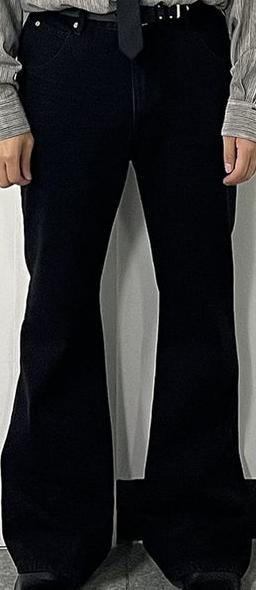

In [81]:
Image.open(keys[index])

In [78]:
print(f"FAISS Ïù∏Îç±Ïä§ ÌÅ¨Í∏∞: {faiss_index.ntotal}, ÏûÑÎ≤†Îî© ÌÅ¨Í∏∞: {embeddings.shape}")


FAISS Ïù∏Îç±Ïä§ ÌÅ¨Í∏∞: 5500, ÏûÑÎ≤†Îî© ÌÅ¨Í∏∞: (5500, 512)


In [79]:
index = 0  # Í≤ÄÏÉâÌï† ÏÉòÌîå Ïù∏Îç±Ïä§ (ÏûÑÏùòÏùò Í∞í ÏÑ§Ï†ï)
if index < embeddings.shape[0]:
    query_vector = embeddings[index].reshape(1, -1)

    # FAISS Í≤ÄÏÉâ ÏàòÌñâ (k Í∞í Ï§ÑÏù¥Í∏∞)
    D, I = faiss_index.search(query_vector, 3)

    print("üîπ Í≤ÄÏÉâ Í≤∞Í≥º:", I)
    print("üîπ Í±∞Î¶¨:", D)
else:
    print("‚ùå Ïò§Î•ò: Í≤ÄÏÉâÌï† Ïù∏Îç±Ïä§Í∞Ä ÏûÑÎ≤†Îî© Î≤îÏúÑÎ•º Ï¥àÍ≥ºÌñàÏäµÎãàÎã§.")

üîπ Í≤ÄÏÉâ Í≤∞Í≥º: [[   0 2645 4998]]
üîπ Í±∞Î¶¨: [[0.         0.2300335  0.23507833]]


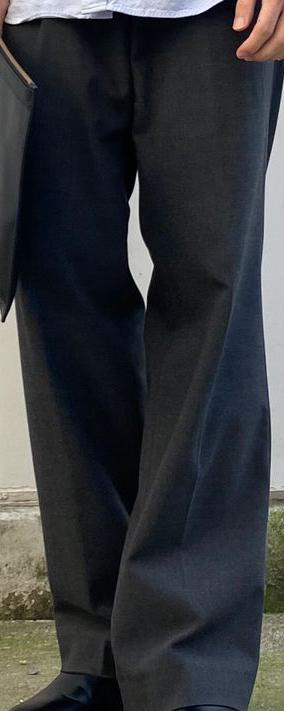

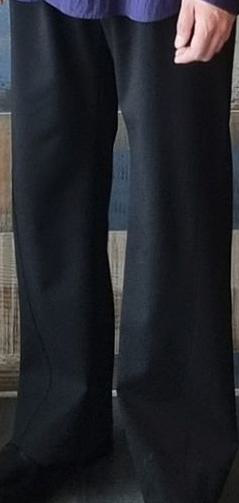

In [80]:
for i in I[0][1:]:
    display(Image.open(keys[i]))